# Divina Commedia Dataset Explanation

In order to showcase our project results here a demo to run our main script "generete_dante.py" and see our Canto printed out with all the requirements needed as:
- terzine structure 
- hendecasyllable verse
- rhyme scheme

### DATA PROCESSING
We first want to show how we performed some data processing in order to get our latest canto, for this reason in the following session we will share different types of Divina Commedia text in order to all the phases we processed before to get out CANTO

#### Data cleaning 

In [1]:
import os
import sys
from dante_by_tonedrev_syl.text_processing import clean_comedy, special_tokens, prettify_text
from dante_by_tonedrev_syl.tone import ToneTagger
from dante_by_tonedrev_syl.syllabification import syllabify_verse, syllabify_verse_prettify
from dante_by_rev_syl.data_preparation import text_in_rev_syls
from dante_by_rev_syl.data_preparation import text_in_syls_rhyme
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
tf.get_logger().setLevel('ERROR')


working_dir = os.path.join(os.path.abspath('.'), 'dante_by_tonedrev_syl')
divine_comedy_file = os.path.join(os.path.dirname(working_dir), "divina_commedia", "divina_commedia_accent_UTF-8.txt")
working_dir

'/Users/allegraadinolfi/Desktop/UNIBO/DEEP LEARNING/deep_comedy/dante_by_tonedrev_syl'

In [2]:
#reading the original divine comedy 
with open(divine_comedy_file,"r") as f:
    divine_comedy = f.read()
#cleaning the divine comedy with our functions    
divine_comedy = clean_comedy(divine_comedy, special_tokens)
print(divine_comedy[:600])
print("Special tokens used: ", special_tokens.values())

<start_of_canto>
<start_of_terzina>
nel <word_sep> mezzo <word_sep> del <word_sep> cammin <word_sep> di <word_sep> nostra <word_sep> vita <end_of_verso>
mi <word_sep> ritrovai <word_sep> per <word_sep> una <word_sep> selva <word_sep> oscura <end_of_verso>
ché <word_sep> la <word_sep> diritta <word_sep> via <word_sep> era <word_sep> smarrita <end_of_verso>
<end_of_terzina>
<start_of_terzina>
ahi <word_sep> quanto <word_sep> a <word_sep> dir <word_sep> qual <word_sep> era <word_sep> è <word_sep> cosa <word_sep> dura <end_of_verso>
esta <word_sep> selva <word_sep> selvaggia <word_sep> e <word_sep
Special tokens used:  dict_values(['<start_of_canto>', '<end_of_canto>', '<start_of_terzina>', '<end_of_terzina>', '<end_of_verso>', '<word_sep>'])


#### Toned Data

In [3]:
#Tone Tagger
tone_tagger = ToneTagger()
tone_tagger.model_tone.summary()

Model: "ToneNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 32)            1088      
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               591872    
_________________________________________________________________
output (Dense)               (None, 30)                15390     
Total params: 608,350
Trainable params: 608,350
Non-trainable params: 0
_________________________________________________________________


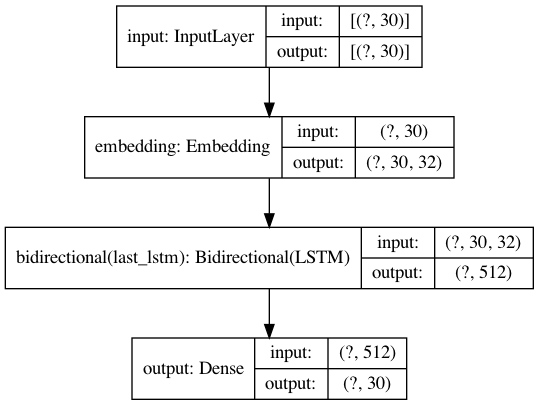

In [4]:
tf.keras.utils.plot_model(tone_tagger.model_tone, show_shapes=True, show_layer_names=True)

In [20]:
from tensorboard.plugins import projector
%load_ext tensorboard
# Set up a logs directory, so Tensorboard knows where to look for files
log_dir=os.path.join('/tmp', 'emb_visual_tensorboard')
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Save Labels separately on a line-by-line manner.
with open(os.path.join(log_dir, 'metadata.tsv'), "w") as f:
    for char in tone_tagger.char2idx.keys():
        f.write('"{}"\n'.format(char))

# Save the weights we want to analyse as a variable. Note that the first
# value represents any unknown word, which is not in the metadata, so
# we will remove that value.
weights = tf.Variable(tone_tagger.model_tone.get_layer('embedding').get_weights()[0])
# Create a checkpoint from embedding, the filename and key are
# name of the tensor.
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

# Set up config
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(log_dir, config)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [21]:
%tensorboard --logdir /tmp/emb_visual_tensorboard/

Reusing TensorBoard on port 6008 (pid 20727), started 0:09:40 ago. (Use '!kill 20727' to kill it.)

In [8]:
divine_comedy_prettified = prettify_text(divine_comedy, special_tokens)
#divine_comedy = remove_all_punctuation(divine_comedy)

divine_comedy_verses = divine_comedy_prettified.split('\n')[:8]

for verse in divine_comedy_verses:
    for w in verse.split():
        print(tone_tagger.tone(w), flush=True, end=' ')
    print('\n')


cànto 

nel mèzzo del cammìn di nòstra vìta 

mi ritrovài per ùna sèlva oscùra 

ché la dirìtta vìa èra smàrrita 



àhi quànto a dir quàl èra è còsa dùra 

èsta sèlva selvàggia e àspra e fòrte 

che nel pènsier rinòva la paùra 



#### Syllabified Data

In [29]:
divine_comedy_list = divine_comedy.split("\n")
divine_comedy_list = [ line for line in divine_comedy_list if line.strip() not in special_tokens.values() ]
for line in divine_comedy_list[:15]:
    syllables = syllabify_verse(line, special_tokens, tone_tagger)
    size = len(syllables)
    print(syllables, flush=True)

['nel', '<word_sep>', 'mèz', 'zo', '<word_sep>', 'del', '<word_sep>', 'cam', 'mìn', '<word_sep>', 'di', '<word_sep>', 'nò', 'stra', '<word_sep>', 'vì', 'ta', '<end_of_verso>']
['mi', '<word_sep>', 'ri', 'tro', 'vài', '<word_sep>', 'per', '<word_sep>', 'ù', 'na', '<word_sep>', 'sèl', 'va<word_sep>o', 'scù', 'ra', '<end_of_verso>']
['ché', '<word_sep>', 'la', '<word_sep>', 'di', 'rìt', 'ta', '<word_sep>', 'vì', 'a', '<word_sep>', 'è', 'ra', '<word_sep>', 'smàr', 'ri', 'ta', '<end_of_verso>']
['àhi', '<word_sep>', 'quàn', 'to', '<word_sep>', 'a', '<word_sep>', 'dir', '<word_sep>', 'quàl', '<word_sep>', 'è', 'ra', '<word_sep>', 'è', '<word_sep>', 'cò', 'sa', '<word_sep>', 'dù', 'ra', '<end_of_verso>']
['è', 'sta', '<word_sep>', 'sèl', 'va', '<word_sep>', 'sel', 'vàg', 'gia<word_sep>e<word_sep>à', 'spra', '<word_sep>', 'e', '<word_sep>', 'fòr', 'te', '<end_of_verso>']
['che', '<word_sep>', 'nel', '<word_sep>', 'pèn', 'sier', '<word_sep>', 'ri', 'nò', 'va', '<word_sep>', 'la', '<word_sep>', 

In [10]:
# printing syllabification without special tokens 
for line in divine_comedy_list[:15]:
    syllables = syllabify_verse_prettify(line, special_tokens, tone_tagger)
    size = len(syllables)
    print(syllables, flush=True)

['nel', 'mèz', 'zo', 'del', 'cam', 'mìn', 'di', 'nò', 'stra', 'vì', 'ta']
['mi', 'ri', 'tro', 'vài', 'per', 'ù', 'na', 'sèl', 'va o', 'scù', 'ra']
['ché', 'la', 'di', 'rìt', 'ta', 'vì', 'a', 'è', 'ra', 'smàr', 'ri', 'ta']
['àhi', 'quàn', 'to', 'a', 'dir', 'quàl', 'è', 'ra', 'è', 'cò', 'sa', 'dù', 'ra']
['è', 'sta', 'sèl', 'va', 'sel', 'vàg', 'gia e à', 'spra', 'e', 'fòr', 'te']
['che', 'nel', 'pèn', 'sier', 'ri', 'nò', 'va', 'la', 'pa', 'ù', 'ra']
['tan', "t'", 'è', 'a', 'mà', 'ra', 'che', 'pò', 'co', 'è', 'più', 'mòr', 'te']
['ma', 'per', 'trat', 'tàr', 'del', 'ben', "ch'i'", 'vi', 'tro', 'vài']
['di', 'rò', 'de', "l'àl", 'tre', 'cò', 'se', "ch'i'", "v'ho", 'scòr', 'te']
['io', 'non', 'so', 'ben', 'ri', 'dìr', "com'", "i'", "v'in", 'trài']
['tan', "t'", 'è', 'ra', 'pièn', 'di', 'sòn', 'no', 'a', 'quèl', 'pùn', 'to']
['che', 'la', 've', 'rà', 'ce', 'vì', 'a ab', 'ban', 'do', 'nài']
['ma', 'pòi', "ch'i'", 'fùi', 'al', 'piè', "d'un", 'còl', 'le', 'giùn', 'to']
['là', 'dò', 've', 'ter', '

#### Reversed data for corpus 

In [26]:
divine_comedy_syls = text_in_rev_syls(divine_comedy)
for syl in divine_comedy_syls[:50]:
    if syl == '<end_of_verso>':
        print('\n')
    print(syl, flush=True, end=' ')




<end_of_verso> ta vi <word_sep> stra no <word_sep> di <word_sep> min cam <word_sep> del <word_sep> zo mez <word_sep> nel 

<end_of_verso> ra scu va<word_sep>o sel <word_sep> na u <word_sep> per <word_sep> vai tro ri <word_sep> mi 

<end_of_verso> ta ri smar <word_sep> ra via<word_sep>e <word_sep> ta rit di <word_sep> la <word_sep> ché 

<end_of_verso> 

#### Rhymes 

In [28]:
divine_comedy_rhyme = text_in_syls_rhyme(divine_comedy)
for syl in divine_comedy_rhyme[:50]:
    if syl not in special_tokens.values():
        print(syl, end=' ')
    else:
        print(syl)
#divine_comedy_rhyme[:100]

<start_of_canto>
<start_of_terzina>
vi ta <end_of_verso>
scu ra <end_of_verso>
ri ta <end_of_verso>
<end_of_terzina>
<start_of_terzina>
du ra <end_of_verso>
for te <end_of_verso>
pau ra <end_of_verso>
<end_of_terzina>
<start_of_terzina>
mor te <end_of_verso>
tro vai <end_of_verso>
scor te <end_of_verso>
<end_of_terzina>
<start_of_terzina>
v'in trai <end_of_verso>
pun to <end_of_verso>
do nai <end_of_verso>
<end_of_terzina>
<start_of_terzina>
giun to <end_of_verso>
val 

In [16]:
from IPython.core.display import display, HTML
display(HTML('<h1>Hello, world!</h1>'))

In [21]:
from IPython.core.display import display, HTML
display(HTML('<h1>Hello, <span style="background-color: #6495ED">blue</span>!</h1>'))